### ライブラリ・ファイルの読み込み

In [70]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

import lightgbm as lgb

In [71]:
import warnings
warnings.filterwarnings('ignore')

In [72]:
sample_submission = pd.read_csv('sample_submission.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
train = pd.read_csv('train.csv', index_col=0)

In [73]:
pd.options.display.max_rows=100
pd.options.display.max_columns=100
pd.options.display.max_seq_items=100

### データの確認・結合

In [74]:
print(train.shape, test.shape)

(159256, 23) (106171, 22)


In [75]:
all = pd.concat((train, test), axis=0)

In [76]:
all

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
id,,,,,,,,,,,,,,,,,,,,,,,
0,55,165,60,81.0,0.5,0.6,1,1,135,87,94,172,300,40,75,16.5,1,1.0,22,25,27,0,1.0
1,70,165,65,89.0,0.6,0.7,2,2,146,83,147,194,55,57,126,16.2,1,1.1,27,23,37,1,0.0
2,20,170,75,81.0,0.4,0.5,1,1,118,75,79,178,197,45,93,17.4,1,0.8,27,31,53,0,1.0
3,35,180,95,105.0,1.5,1.2,1,1,131,88,91,180,203,38,102,15.9,1,1.0,20,27,30,1,0.0
4,30,165,60,80.5,1.5,1.0,1,1,121,76,91,155,87,44,93,15.4,1,0.8,19,13,17,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265422,40,165,60,78.0,0.8,0.9,1,1,112,78,134,225,82,59,149,16.4,1,1.1,24,31,28,0,NaN
265423,40,170,85,95.0,1.2,1.2,1,1,130,90,97,180,186,44,100,16.0,2,1.0,25,31,38,0,NaN
265424,35,170,85,89.0,1.2,1.2,1,1,131,86,106,211,76,53,142,15.9,1,0.8,33,32,24,1,NaN


In [77]:
all.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

In [78]:
all.dtypes

age                      int64
height(cm)               int64
weight(kg)               int64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)            int64
hearing(right)           int64
systolic                 int64
relaxation               int64
fasting blood sugar      int64
Cholesterol              int64
triglyceride             int64
HDL                      int64
LDL                      int64
hemoglobin             float64
Urine protein            int64
serum creatinine       float64
AST                      int64
ALT                      int64
Gtp                      int64
dental caries            int64
smoking                float64
dtype: object

<Axes: xlabel='smoking', ylabel='Density'>

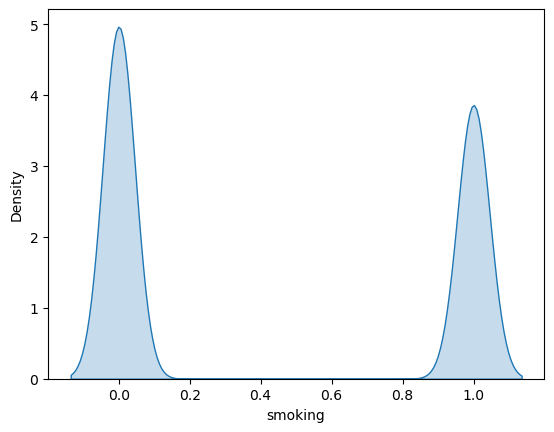

In [79]:
sns.kdeplot(train['smoking'], fill=True)
# sns.kdeplot(test['smoking'], fill=True)

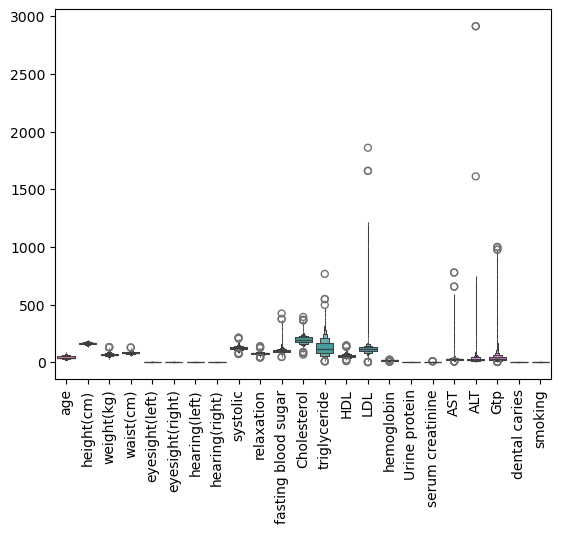

In [80]:
sns.boxenplot(all)
plt.xticks(rotation=90);

In [81]:
all.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

<Axes: >

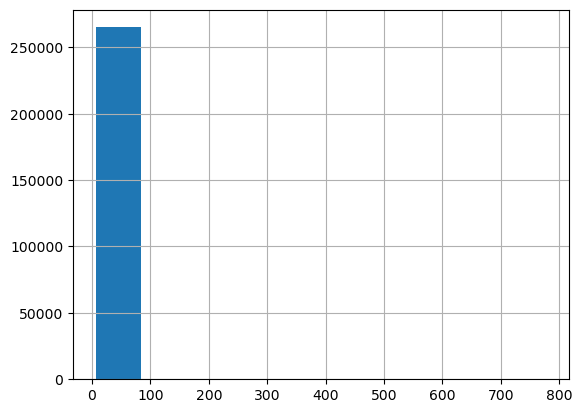

In [82]:
all['AST'].hist()

In [83]:
all.isnull().sum()

age                         0
height(cm)                  0
weight(kg)                  0
waist(cm)                   0
eyesight(left)              0
eyesight(right)             0
hearing(left)               0
hearing(right)              0
systolic                    0
relaxation                  0
fasting blood sugar         0
Cholesterol                 0
triglyceride                0
HDL                         0
LDL                         0
hemoglobin                  0
Urine protein               0
serum creatinine            0
AST                         0
ALT                         0
Gtp                         0
dental caries               0
smoking                106171
dtype: int64

In [84]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265427 entries, 0 to 265426
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  265427 non-null  int64  
 1   height(cm)           265427 non-null  int64  
 2   weight(kg)           265427 non-null  int64  
 3   waist(cm)            265427 non-null  float64
 4   eyesight(left)       265427 non-null  float64
 5   eyesight(right)      265427 non-null  float64
 6   hearing(left)        265427 non-null  int64  
 7   hearing(right)       265427 non-null  int64  
 8   systolic             265427 non-null  int64  
 9   relaxation           265427 non-null  int64  
 10  fasting blood sugar  265427 non-null  int64  
 11  Cholesterol          265427 non-null  int64  
 12  triglyceride         265427 non-null  int64  
 13  HDL                  265427 non-null  int64  
 14  LDL                  265427 non-null  int64  
 15  hemoglobin           2

In [85]:
all.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,265427.000000,159256.000000
mean,44.354591,165.248686,67.136444,83.001151,1.005389,1.000387,1.024071,1.023645,122.492350,76.852713,98.370708,195.827455,127.532109,55.880525,114.603571,14.795521,1.073659,0.892644,25.533958,26.556349,36.164358,0.196981,0.437365
std,11.864380,8.826224,12.586326,8.953381,0.400349,0.389693,0.153269,0.151941,12.743802,9.004327,15.332993,28.412319,66.254392,13.978732,27.679074,1.432445,0.345058,0.179578,9.480731,17.829734,31.094341,0.397718,0.496063
min,20.000000,135.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,46.000000,66.000000,8.000000,9.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000,0.000000
25%,40.000000,160.000000,60.000000,77.000000,0.800000,0.800000,1.000000,1.000000,114.000000,70.000000,90.000000,175.000000,77.000000,45.000000,95.000000,13.800000,1.000000,0.800000,20.000000,16.000000,18.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,83.000000,1.000000,1.000000,1.000000,1.000000,121.000000,78.000000,96.000000,196.000000,115.000000,54.000000,114.000000,15.000000,1.000000,0.900000,24.000000,22.000000,27.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,89.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,103.000000,217.000000,165.000000,64.000000,133.000000,15.800000,1.000000,1.000000,29.000000,32.000000,44.000000,0.000000,1.000000
max,85.000000,190.000000,130.000000,127.700000,9.900000,9.900000,2.000000,2.000000,213.000000,140.000000,423.000000,393.000000,766.000000,148.000000,1860.000000,21.100000,6.000000,9.900000,778.000000,2914.000000,999.000000,1.000000,1.000000


In [86]:
all['hearing(right)'].value_counts()

hearing(right)
1    259151
2      6276
Name: count, dtype: int64

In [87]:
train.corrwith(train['smoking']).sort_values(ascending=False)

smoking                1.000000
hemoglobin             0.450679
height(cm)             0.447111
weight(kg)             0.351748
triglyceride           0.331975
Gtp                    0.305561
serum creatinine       0.272979
waist(cm)              0.262715
ALT                    0.163016
eyesight(right)        0.109781
relaxation             0.109501
dental caries          0.106636
eyesight(left)         0.100420
fasting blood sugar    0.096534
AST                    0.059394
systolic               0.058642
Urine protein         -0.028548
hearing(right)        -0.036858
hearing(left)         -0.038219
Cholesterol           -0.051896
LDL                   -0.072285
age                   -0.206033
HDL                   -0.271186
dtype: float64

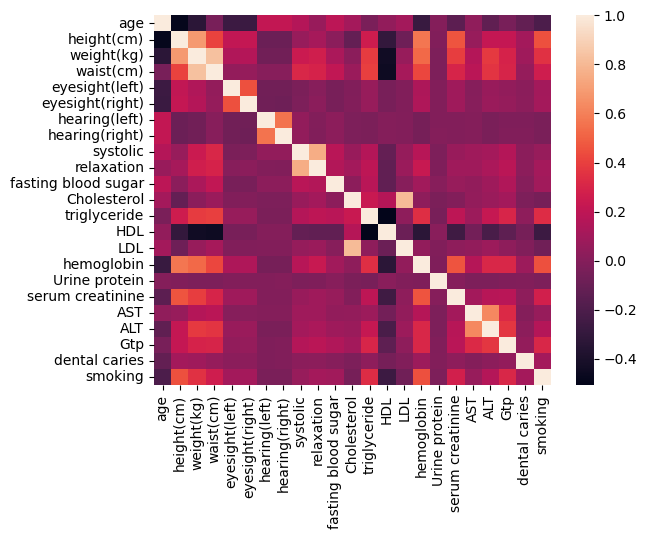

In [88]:
sns.heatmap(train.corr());

In [89]:
train.columns

Index(['age', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'eyesight(right)', 'hearing(left)', 'hearing(right)', 'systolic',
       'relaxation', 'fasting blood sugar', 'Cholesterol', 'triglyceride',
       'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 'AST',
       'ALT', 'Gtp', 'dental caries', 'smoking'],
      dtype='object')

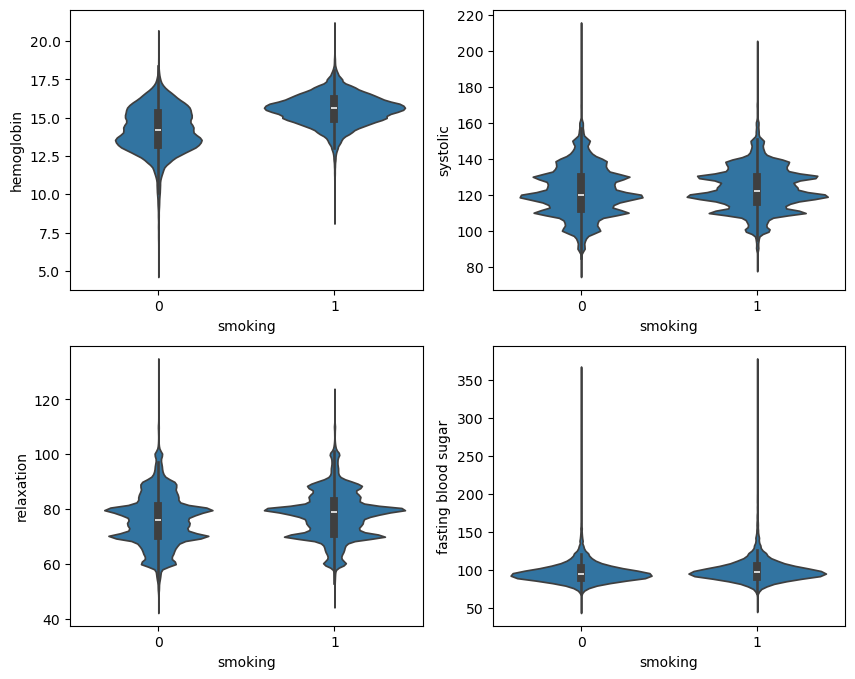

In [90]:
fig, axs = plt.subplots(2, 2, figsize=(10, 4 * 2))
sns.violinplot(x='smoking', y='hemoglobin', data=train, ax=axs[0,0])
sns.violinplot(x='smoking', y='systolic', data=train, ax=axs[0,1])
sns.violinplot(x='smoking', y='relaxation', data=train, ax=axs[1,0])
sns.violinplot(x='smoking', y='fasting blood sugar', data=train, ax=axs[1,1]);

### 前処理・特徴量の追加

In [91]:
# カラム名のホワイトスペースをアンダーバーに変換
all.columns = all.columns.str.replace(' ', '_')

In [92]:
# 外れ値のクリッピング
all['Gtp'] = np.clip(all['Gtp'], 0, 300)
all['HDL'] = np.clip(all['HDL'], 0, 110)
all['LDL'] = np.clip(all['LDL'], 0, 200)
all['ALT'] = np.clip(all['ALT'], 0, 150)
all['AST'] = np.clip(all['AST'], 0, 100)
all['serum_creatinine'] = np.clip(all['serum_creatinine'], 0, 3) 

In [93]:
all.info()

<class 'pandas.core.frame.DataFrame'>
Index: 265427 entries, 0 to 265426
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   age                  265427 non-null  int64  
 1   height(cm)           265427 non-null  int64  
 2   weight(kg)           265427 non-null  int64  
 3   waist(cm)            265427 non-null  float64
 4   eyesight(left)       265427 non-null  float64
 5   eyesight(right)      265427 non-null  float64
 6   hearing(left)        265427 non-null  int64  
 7   hearing(right)       265427 non-null  int64  
 8   systolic             265427 non-null  int64  
 9   relaxation           265427 non-null  int64  
 10  fasting_blood_sugar  265427 non-null  int64  
 11  Cholesterol          265427 non-null  int64  
 12  triglyceride         265427 non-null  int64  
 13  HDL                  265427 non-null  int64  
 14  LDL                  265427 non-null  int64  
 15  hemoglobin           2

In [94]:
# 型の変換
all['age'] = all['age'].astype('float64')
all['height(cm)'] = all['height(cm)'].astype('float64')
all['weight(kg)'] = all['weight(kg)'].astype('float64')
all['systolic'] = all['systolic'].astype('float64')
all['relaxation'] = all['relaxation'].astype('float64')
all['fasting_blood_sugar'] = all['fasting_blood_sugar'].astype('float64')
all['Cholesterol'] = all['Cholesterol'].astype('float64')
all['triglyceride'] = all['triglyceride'].astype('float64')
all['HDL'] = all['HDL'].astype('float64')
all['LDL'] = all['LDL'].astype('float64')
all['AST'] = all['AST'].astype('float64')
all['ALT'] = all['ALT'].astype('float64')
all['Gtp'] = all['Gtp'].astype('float64')
all['Urine_protein'] = all['Urine_protein'].astype('float64')

In [95]:
all['height*hemoglobin'] = all['height(cm)'] * all['hemoglobin']

In [96]:
all['triglyceride*Gtp'] = all['triglyceride'] * all['Gtp']

In [97]:
all['bmi'] = all['weight(kg)'] / ((all['height(cm)']/100)**2)

In [98]:
all['eyesight(left)'] = all['eyesight(left)'].replace({9.9: 1.0, 7.9: 1.0})
all['eyesight(right)'] = all['eyesight(right)'].replace({9.9: 1.0, 5.0: 1.0})

In [99]:
all['eyesight'] = (all['eyesight(left)'] + all['eyesight(right)']).astype('float64')

In [100]:
all['hearing'] = all['hearing(left)'] + all['hearing(right)']

In [101]:
all = all.drop(columns=['eyesight(left)', 'eyesight(right)'])
all = all.drop(columns=['hearing(left)', 'hearing(right)'])

In [102]:
num_col = [col for col in all.drop(columns='smoking').columns if all[col].dtypes == 'float64']
cat_col = [col for col in all.columns if all[col].dtypes == 'int64']

In [103]:
cat_col

['dental_caries', 'hearing']

In [104]:
# スケーリング、エンコーディング
ss = StandardScaler()
all[num_col] = ss.fit_transform(all[num_col])

oe = OrdinalEncoder()
all['hearing'] = oe.fit_transform(all[['hearing']])

all = pd.get_dummies(all, columns=['dental_caries'], dtype=int)

### train,test分割

In [105]:
train = all[~all['smoking'].isnull()]
test = all[all['smoking'].isnull()]
test = test.drop(columns='smoking')

In [106]:
display(train.head(), test.head())

,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting_blood_sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine_protein,serum_creatinine,AST,ALT,Gtp,smoking,height*hemoglobin,triglyceride*Gtp,bmi,eyesight,hearing,dental_caries_0,dental_caries_1
id,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.897260,-0.028176,-0.567001,-0.223508,0.981471,1.126937,-0.285053,-0.838633,2.603121,-1.137458,-1.524090,1.189911,-0.213468,0.609001,-0.408720,-0.099134,-0.311643,1.0,0.831704,0.466256,-0.717940,-1.557902,0.0,1,0
1,2.161551,-0.028176,-0.169744,0.670011,1.844637,0.682705,3.171552,-0.064319,-1.094754,0.080568,0.442876,0.980479,-0.213468,1.175642,0.175908,-0.231504,0.034364,0.0,0.679433,-0.511796,-0.172314,-1.208683,2.0,0,1
2,-2.052753,0.538319,0.624771,-0.223508,-0.352513,-0.205758,-1.263337,-0.627456,1.048504,-0.779215,-0.829867,1.818208,-0.213468,-0.524282,0.175908,0.297975,0.587974,1.0,1.556145,0.843770,0.444584,-1.907120,0.0,1,0
3,-0.788462,1.671308,2.213800,2.457049,0.667592,1.237995,-0.480710,-0.557064,1.139065,-1.280755,-0.482755,0.771046,-0.213468,0.609001,-0.642571,0.033235,-0.207841,0.0,1.260832,0.142120,1.445620,1.235846,0.0,0,1
4,-1.209892,-0.028176,-0.567001,-0.279353,-0.117104,-0.094701,-0.480710,-1.436966,-0.611766,-0.850863,-0.829867,0.421992,-0.213468,-0.524282,-0.759497,-0.893353,-0.657649,1.0,0.273377,-0.601458,-0.717940,0.886627,0.0,1,0


,age,height(cm),weight(kg),waist(cm),systolic,relaxation,fasting_blood_sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine_protein,serum_creatinine,AST,ALT,Gtp,height*hemoglobin,triglyceride*Gtp,bmi,eyesight,hearing,dental_caries_0,dental_caries_1
id,,,,,,,,,,,,,,,,,,,,,,,,
159256,-0.367031,-0.028176,0.227514,0.111561,0.589123,1.349053,0.562793,0.146857,0.882477,-0.492621,0.018628,-0.415738,-0.213468,0.042359,-0.759497,-0.099134,-0.138639,-0.335707,0.119866,0.373313,0.712018,0.0,1,0
159257,3.004411,-0.594671,-0.567001,1.116770,1.687698,-0.538932,-0.350272,-0.838633,0.459863,-1.495701,-0.405619,-1.253468,-0.213468,1.175642,-0.642571,-0.959538,-0.415444,-1.144743,-0.228460,-0.302326,0.013581,2.0,1,0
159258,1.318690,0.538319,0.227514,0.390786,-0.430983,-0.205758,-0.415491,-1.225789,0.686264,-1.209106,-1.022707,0.421992,-0.213468,2.875567,1.462091,2.217338,-0.000237,0.510243,0.164374,-0.069419,-1.208683,0.0,1,0
159259,-0.367031,-0.594671,-1.361515,-1.787166,-0.509453,-1.649512,-0.480710,0.604406,-1.215501,1.370242,0.520012,-0.206306,-0.213468,-1.657565,-0.057943,-0.562429,-0.899853,-0.406459,-0.764171,-1.462848,-2.256339,0.0,0,1
159260,-0.367031,0.538319,0.624771,0.714687,0.746062,1.904342,-1.263337,-0.909025,-0.415552,-1.209106,0.327172,1.189911,-0.213468,0.609001,0.526685,0.827455,-0.311643,1.085489,-0.404557,0.444584,-0.161028,0.0,0,1


### lightgbm

In [121]:
train_X = train.drop(columns='smoking')
train_y = train['smoking']
test_X =test.copy()

scores = []
counts = []
lgb_probas = []

kf = StratifiedKFold(n_splits=4, shuffle=True, random_state=3)

for tr_idx, va_idx in kf.split(train_X, train_y):
    tr_X, va_X = train_X.iloc[tr_idx], train_X.iloc[va_idx]
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

    lgb_train = lgb.Dataset(tr_X, tr_y)
    lgb_valid = lgb.Dataset(va_X, va_y)

    params = {  'objective': 'binary', 
                'seed': 3, 
                'verbose': 0, 
                'metric': 'auc', 
                'learning_rate': 0.1, 
                'num_leaves': 25, 
                'min_data_in_leaf': 33, 
                'feature_fraction': 1.0, 
                'bagging_fraction': 1.0
                }
    num_round = 330
    
    model1 = lgb.train(params, lgb_train, num_boost_round=num_round, valid_names=['train', 'valid'], valid_sets=[lgb_train, lgb_valid])

    pred1_proba = model1.predict(va_X)
    th = 0.443
    pred1 = np.where(pred1_proba < th, 0, 1).astype(int)
    score1 = roc_auc_score(va_y, pred1)
    print(score1)

    df_pred1=pd.DataFrame(pred1)
    print(df_pred1.value_counts())

    lgb_proba = model1.predict(test_X)

    scores.append(score1)
    counts.append(df_pred1.value_counts())
    lgb_probas.append(lgb_proba)

    # for confusion_matrix
    train_proba = model1.predict(train_X)
    train_pred = np.where(train_proba < th, 0, 1).astype(int)

print('-------')
print('total: ')
print(f'0の割合: {round(((sum(counts[i][0] for i in range(len(counts)))) / len(counts))*100/len(va_X), 4)}')
print(f'1の割合: {100-round(((sum(counts[i][0] for i in range(len(counts)))) / len(counts))*100/len(va_X), 4)}')
print(np.mean(scores))

0.7902222554922969
1    21270
0    18544
Name: count, dtype: int64
0.7922591608261494
1    21219
0    18595
Name: count, dtype: int64
0.7868970413674375
1    21178
0    18636
Name: count, dtype: int64
0.7896023372175295
1    21242
0    18572
Name: count, dtype: int64
-------
total: 
0の割合: 46.684
1の割合: 53.316
0.7897451987258534


In [122]:
train['smoking'].value_counts()/train['smoking'].value_counts().sum()*100

smoking
0.0    56.2635
1.0    43.7365
Name: count, dtype: float64

In [123]:
df_lgb_probas = pd.DataFrame(lgb_probas).T
lgb_proba_mean = df_lgb_probas.mean(axis=1)
lgb_pred = lgb_proba_mean.apply(lambda x: 0 if x < th else 1).astype(int)

counts = lgb_pred.value_counts()
print(counts)
print(f'0の割合: {round(counts[0]*100/len(test_X),4)}')
print(f'1の割合: {100-round(counts[0]*100/len(test_X),4)}')

pred = np.array(lgb_pred)

1    56591
0    49580
Name: count, dtype: int64
0の割合: 46.6983
1の割合: 53.3017


              precision    recall  f1-score   support

         0.0       0.89      0.74      0.80     89603
         1.0       0.72      0.88      0.79     69653

    accuracy                           0.80    159256
   macro avg       0.80      0.81      0.80    159256
weighted avg       0.81      0.80      0.80    159256

[[65930 23673]
 [ 8364 61289]]
1    84962
0    74294
Name: count, dtype: int64


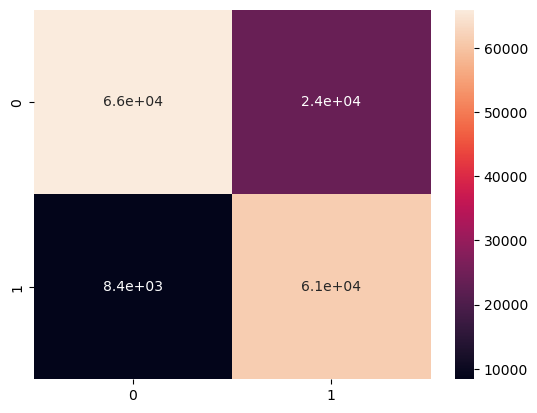

In [124]:
# confusion_matrix(train_X)
train_proba = model1.predict(train_X)
train_pred = np.where(train_proba < th, 0, 1).astype(int)

print(classification_report(train_y, train_pred))
cm = confusion_matrix(train_y, train_pred)
print(cm)
print(pd.DataFrame(train_pred).value_counts())
sns.heatmap(cm, annot=True);

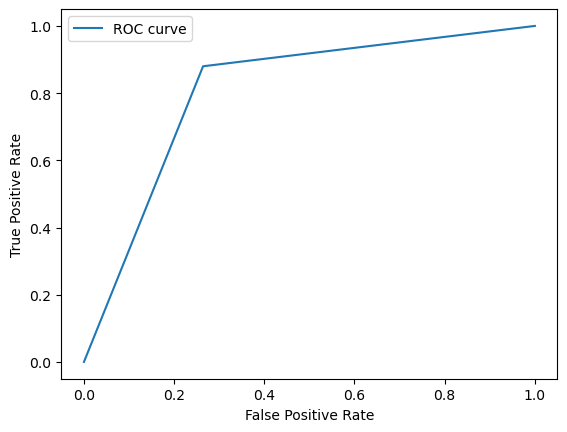

In [125]:
# ROC曲線を描画
fpr, tpr, thresholds = roc_curve(train_y, train_pred)
plt.plot(fpr, tpr, label="ROC curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

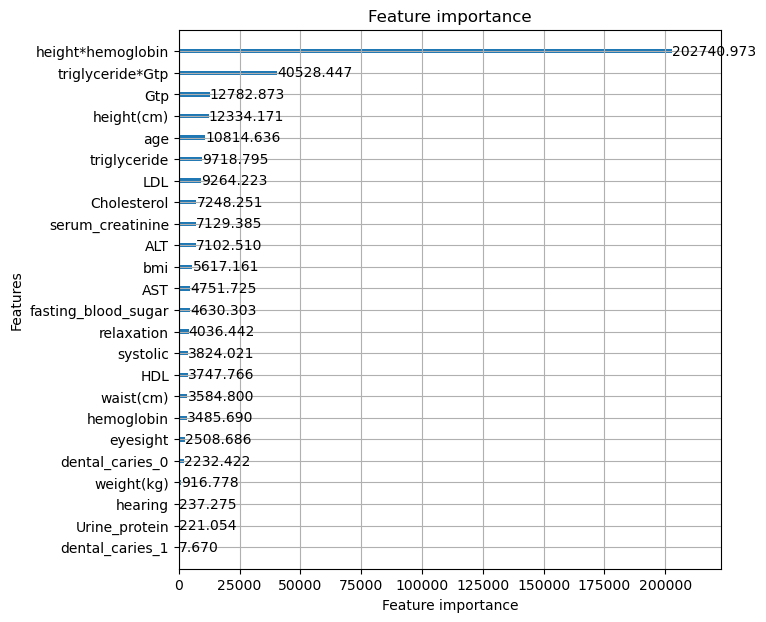

In [126]:
# feature_importances
importances = model1.feature_importance(importance_type='gain')
lgb.plot_importance(model1, importance_type='gain', figsize=(7, 7));

### submission作成

In [127]:
submission = sample_submission.copy()
submission['smoking'] = np.array(lgb_proba_mean*th/0.5)
submission.to_csv('submission_02.csv')